### Context for Mini-Project LR part 4

Preparation for part 4.  Import modules and load data

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\saus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# get and prep data
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---
## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [5]:
# from Part 3 checkup set V
# fit a model to 3 predictors
mCRP = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(mCRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.09e-97
Time:                        22:50:53   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

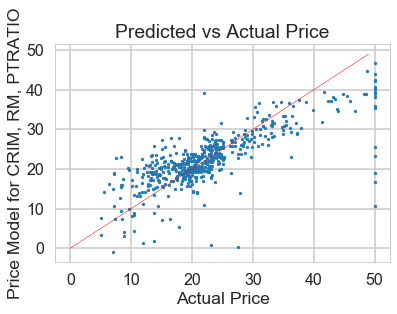

In [6]:
# now plot 
plt.clf()
plt.scatter(x=bos.PRICE, y=mCRP.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Price Model for CRIM, RM, PTRATIO')
plt.show()

In [7]:
# Part 4 checkup 
# fit a model to 4 predictors
mCRPL = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(mCRPL.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          6.39e-123
Time:                        22:50:53   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

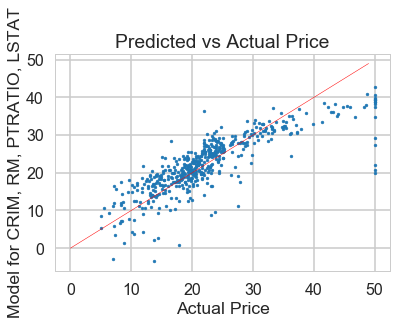

In [8]:
# now plot 
plt.clf()
plt.scatter(x=bos.PRICE, y=mCRPL.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Model for CRIM, RM, PTRATIO, LSTAT')
plt.show()

In [9]:
### Part 4 Checkup Exercises 
### Exercise: Compute the  F-test comparing the two models as well as the AIC. Which model is better?

# mCRP is the model with 3 parameters
# mCPL is the model with 4 parameters

def Ftest(mSub, mSup, Y):
    ''' calculate F for 2 OLS LT models.  mSub parameters are subset of mSup parms '''
    rssSub = np.sum((mSub.fittedvalues - Y)**2)
    # print(rssSub)
    rssSup = np.sum((mSup.fittedvalues - Y)**2)
    # print(rssSup)
    dfSub = len(mSub.fittedvalues) - mSub.df_model -1
    # print(dfSub)
    dfSup = len(mSup.fittedvalues) - mSup.df_model -1
    # print(dfSup) 
    numerator = (rssSub - rssSup)/(dfSub - dfSup)
    denominator = rssSup/dfSup
    # print(numerator/denominator)
    return numerator/denominator

Ftest(mCRP, mCRPL, bos.PRICE)

138.3129726733036

In [10]:
# is ssr the same as RSS??  it's not documented but looks to be the same thing...  Wouldn't be wise to depend on it.
mCRP.ssr

17367.841061728686

In [11]:
mCRPL.ssr

13610.373547624751

#### Part 4 Checkup Exercises
Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the  F-test comparing the two models as well as the AIC. Which model is better?

#### Answer:
The F-stat for the second model (4 parms) and first model (3 parms) is 138.31.  The AIC for 3 parameter model is 3233.  The AIC for 4 parameter model is 3112.  The lower AIC for 4 parameter model indicates a better fit.

As confirmation, the $R^2$ of the 4 parameter model is 0.681 while the  $R^2$ of the 3 parameter model is 0.593.

Additional the respective plots visually show a better fit for the 4 parameter model.